In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("/home/atswi/Downloads/housing.csv",delim_whitespace=True,header=None)
df.columns=["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSAT","MEDV"]
print(df)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSAT  MEDV  
0       15.3  396.90  4.98  24.0  
1       17.8  396.90  9.14  2

In [3]:
df=df[df.MEDV<50]
df.insert(0,'X_0',1)
train=df
test=df.sample(frac=0.2,random_state=3)
print("Training set: ")
print(train)

Training set: 
     X_0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0      1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1      1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2      1  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3      1  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4      1  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..   ...      ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501    1  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502    1  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503    1  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504    1  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505    1  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LS

In [4]:
trainy=pd.DataFrame(train[train.columns[-1]])
trainx=train.drop(labels="MEDV",axis=1)
trainx_t=np.transpose(trainx)


In [5]:
theta=[]
theta=np.linalg.inv(trainx_t.dot(trainx))
theta=theta.dot(trainx_t)
theta=theta.dot(trainy)
print("Hypothesis in matrix form: ")
print(theta)

Hypothesis in matrix form: 
[[ 3.22298417e+01]
 [-1.06715912e-01]
 [ 3.53133180e-02]
 [-4.38830943e-02]
 [ 4.52209315e-01]
 [-1.23981083e+01]
 [ 3.75945346e+00]
 [-2.36790549e-02]
 [-1.21096549e+00]
 [ 2.51301879e-01]
 [-1.37774382e-02]
 [-8.38180086e-01]
 [ 7.85316354e-03]
 [-3.50107918e-01]]


In [6]:
resulty=(df.drop(labels="MEDV",axis=1)).dot(theta) #MEDV of the whole data set through regression
resulty.columns=["MEDV"]
print("Prediction: ")
print(resulty)

Prediction: 
          MEDV
0    29.037346
1    24.523940
2    29.574741
3    28.426552
4    27.964960
..         ...
501  23.324969
502  21.845178
503  26.072693
504  24.834224
505  21.566259

[490 rows x 1 columns]


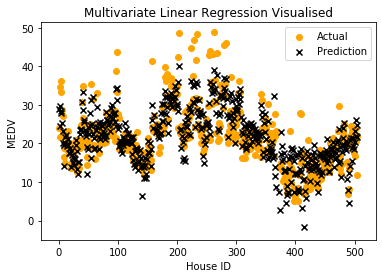

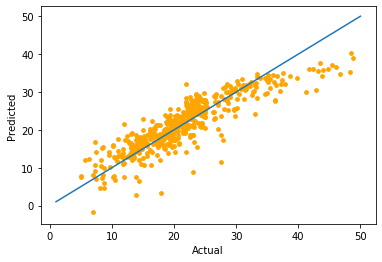

In [7]:
real=plt.scatter(df.index,df["MEDV"],color='orange') #original 
pred=plt.scatter(df.index,resulty,marker='x',color='black') #regression
plt.xlabel("House ID")
plt.ylabel("MEDV")
plt.title("Multivariate Linear Regression Visualised")
plt.legend((real,pred),('Actual','Prediction'))
plt.show()

yx=[1,50]
plt.plot(yx,yx)
plt.scatter(trainy,resulty,s=14,color='orange')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()
#More accurate points will lie closer to the y=x line

In [8]:
mse=0
resultynp=resulty.to_numpy()
trainynp=trainy.to_numpy()
mse=np.square(np.subtract(trainynp,resultynp)).mean()

print("MSE:")
print(mse)

MSE:
13.72657220121374
